### Imports and Data Loading

This section imports the necessary libraries and loads the CIFAR-10 dataset. The dataset is normalized to ensure the pixel values are between 0 and 1, which helps the model train more efficiently.

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import seaborn as sns
from random import randrange
import matplotlib.animation as animation
from IPython.display import HTML, display
from graphviz import Digraph
import os

# Set TensorFlow logging level to suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 = all messages, 1 = INFO, 2 = WARNING, 3 = ERROR

# Load the CIFAR-10 dataset
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Print shapes of the datasets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Normalize the data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Define class names
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
print("Class names:", class_names)

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Class names: ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


### Data Exploration

Explore the dataset by displaying various statistics and visualizations. This section includes displaying basic statistics and plotting the distribution of classes in the training and test datasets.

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


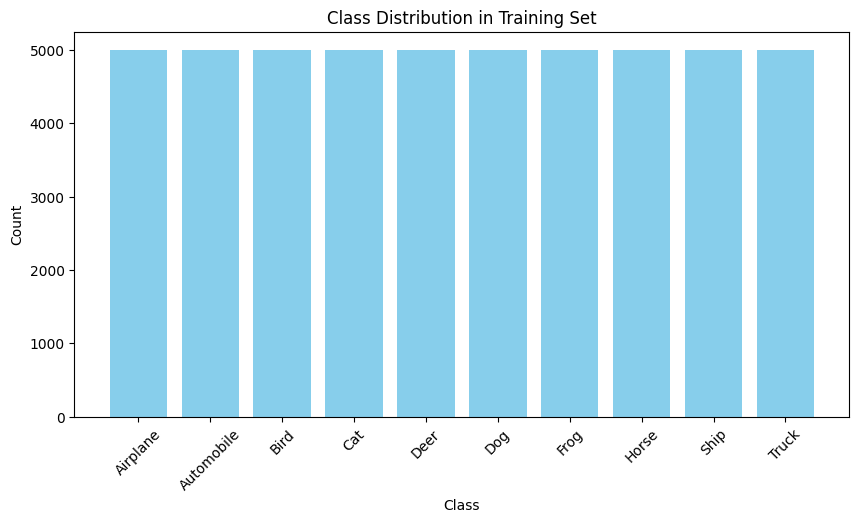

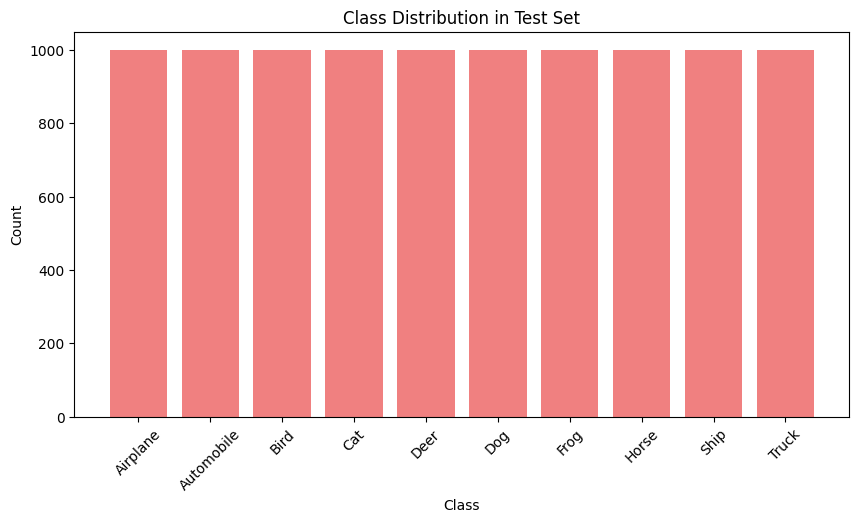

In [10]:
# Display some basic statistics
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Plot the distribution of classes in the training dataset
plt.figure(figsize=(10, 5))
plt.bar(class_names, np.bincount(y_train.flatten()), color='skyblue')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of classes in the test dataset
plt.figure(figsize=(10, 5))
plt.bar(class_names, np.bincount(y_test.flatten()), color='lightcoral')
plt.title('Class Distribution in Test Set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Display a Grid of Images for Each Class

To better understand the dataset, a grid of images for each class is displayed. This visualization helps in getting an overview of what each class in the dataset looks like.

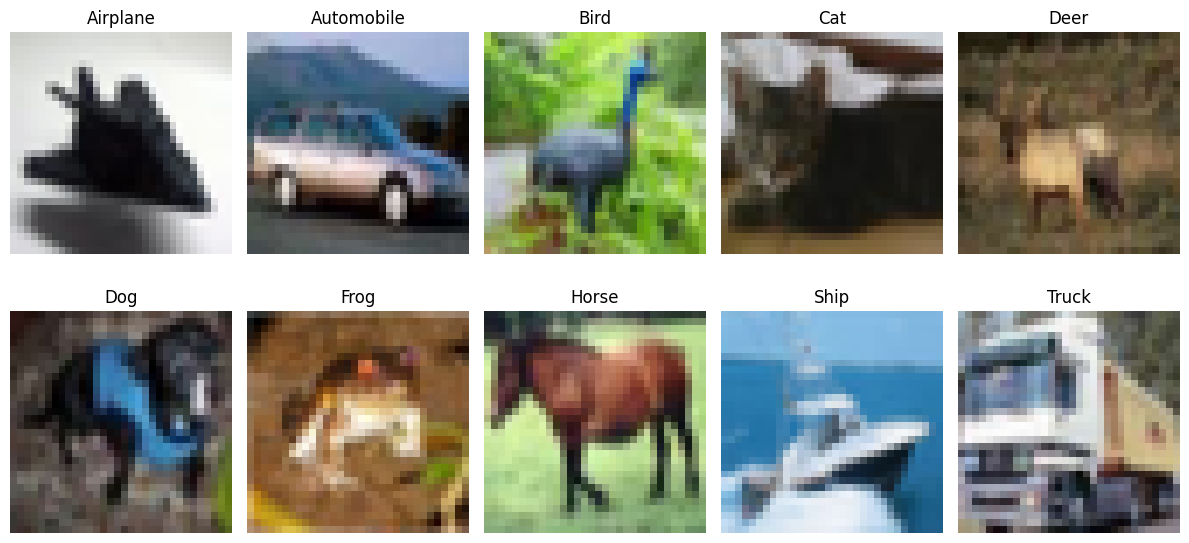

In [11]:
# Display a grid of images for each class
def display_class_images(X_data, y_data, class_names, num_classes=10):
    # Create a figure with a grid of subplots
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    axes = axes.flatten()

    # Loop through each class
    for i in range(num_classes):
        # Find the first image of each class
        index = np.where(y_data == i)[0][0]
        image = X_data[index]

        # Display the image on the corresponding subplot
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(class_names[i])
        axes[i].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Display a grid of images for each class
display_class_images(X_train, y_train, class_names)

### Viewing Combined Dataset Summary

Create and display a combined summary of the dataset to understand the distribution of classes in both training and test sets.

In [12]:
# Function to create a combined summary DataFrame of the dataset
def create_combined_dataset_summary(y_train, y_test, class_names):
    # Count the number of samples for each class in the training and test datasets
    train_class_counts = np.bincount(y_train.flatten(), minlength=len(class_names))
    test_class_counts = np.bincount(y_test.flatten(), minlength=len(class_names))
    
    # Create a combined DataFrame with the class names and their counts for both datasets
    combined_summary_df = pd.DataFrame({
        'Class Name': class_names,
        'Training Count': train_class_counts,
        'Test Count': test_class_counts
    })
    
    return combined_summary_df

# Create and display the combined summary DataFrame for the training and test datasets
combined_summary_df = create_combined_dataset_summary(y_train, y_test, class_names)
print("Combined Dataset Summary:")
display(combined_summary_df)

Combined Dataset Summary:


Class Name  Training Count  Test Count
0    Airplane            5000        1000
1  Automobile            5000        1000
2        Bird            5000        1000
3         Cat            5000        1000
4        Deer            5000        1000
5         Dog            5000        1000
6        Frog            5000        1000
7       Horse            5000        1000
8        Ship            5000        1000
9       Truck            5000        1000

### CNN Model Definition

Define the architecture of the Convolutional Neural Network (CNN). The model includes multiple convolutional layers to extract features from images, pooling layers to reduce dimensionality, and dense layers for classification.

In [13]:
# Define the Convolutional Neural Network (CNN)
model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Display the model's architecture
model.summary()

# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 32, 32, 3)
X_test = X_test.reshape(-1, 32, 32, 3)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

### CNN Model Training

Train the CNN model using the training dataset. A custom callback is implemented to store the training history, including loss and accuracy metrics for both training and validation sets.

In [14]:
class TrainingHistory(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.model.history.history.setdefault('loss', []).append(logs.get('loss'))
        self.model.history.history.setdefault('accuracy', []).append(logs.get('accuracy'))
        self.model.history.history.setdefault('val_loss', []).append(logs.get('val_loss'))
        self.model.history.history.setdefault('val_accuracy', []).append(logs.get('val_accuracy'))

# Train the CNN model with a validation split and custom callback
training_history = TrainingHistory()
model_history = model.fit(
    X_train, y_train, epochs=40, validation_split=0.2, callbacks=[training_history]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/40
1250/1250 [==============================] - 13s 10ms/step - loss: 1.5128 - accuracy: 0.4486 - val_loss: 1.2715 - val_accuracy: 0.5469
Epoch 2/40
1250/1250 [==============================] - 13s 10ms/step - loss: 1.1355 - accuracy: 0.6003 - val_loss: 1.1082 - val_accuracy: 0.6121
Epoch 3/40
1250/1250 [==============================] - 13s 11ms/step - loss: 0.9605 - accuracy: 0.6622 - val_loss: 0.9820 - val_accuracy: 0.6607
Epoch 4/40
1250/1250 [==============================] - 13s 10ms/step - loss: 0.8423 - accuracy: 0.7064 - val_loss: 0.8986 - val_accuracy: 0.6908
Epoch 5/40
1250/1250 [==============================] - 13s 10ms/step - loss: 0.7397 - accuracy: 0.7411 - val_loss: 0.8724 - val_accuracy: 0.6965
Epoch 6/40
1250/1250 [==============================] - 13s 10ms/step - loss: 0.6589 - accuracy: 0.7681 - val_loss: 0.8445 - val_accuracy: 0.7134
Epoch 7/40
1250/1250 [==============================] - 13s 10ms/step - loss: 0.5817 - accuracy: 0.7970 - val_loss: 0.8891 -

### Plotting Training History

Visualize the training and validation metrics over the epochs to understand how the model is learning. This helps in identifying any overfitting or underfitting issues.

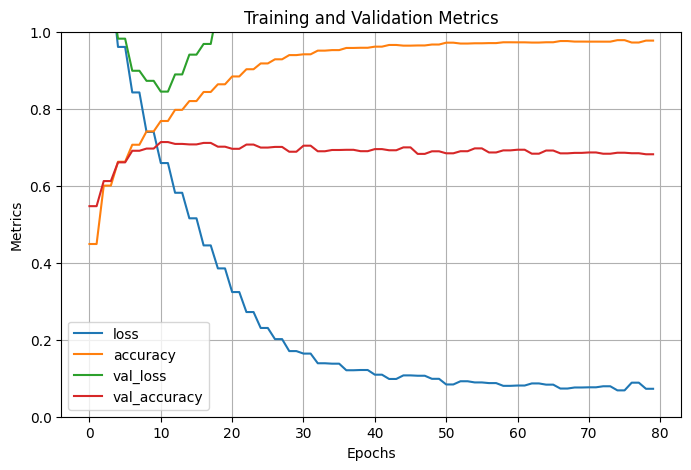

In [15]:
# Plot the training history
history_df = pd.DataFrame(model_history.history)
history_df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title("Training and Validation Metrics")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.show()

### Animate Training Process

Create an animation to visualize the training process. This animation shows how the accuracy changes over epochs for both training and validation sets.

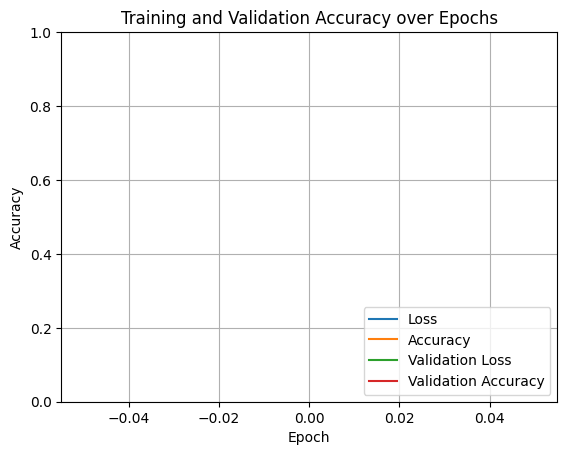

In [20]:
# Animate training process
def animate_training(i):
    plt.cla()
    plt.plot(model_history.history['loss'][:i+1], label='Loss')
    plt.plot(model_history.history['accuracy'][:i+1], label='Accuracy')
    plt.plot(model_history.history['val_loss'][:i+1], label='Validation Loss')
    plt.plot(model_history.history['val_accuracy'][:i+1], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.ylim([0, 1])
    plt.grid(True)

fig = plt.figure()
ani = animation.FuncAnimation(fig, animate_training, frames=len(model_history.history['accuracy']), interval=500, repeat=False)
HTML(ani.to_jshtml())

### Making Predictions

Use the trained CNN model to make predictions on the test set. The predictions are then converted to class labels to compare them with the actual labels.

In [21]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


### Animate Predictions

Create an animation to visualize the predictions made by the model. This animation shows the predicted and actual labels for a subset of the test images.

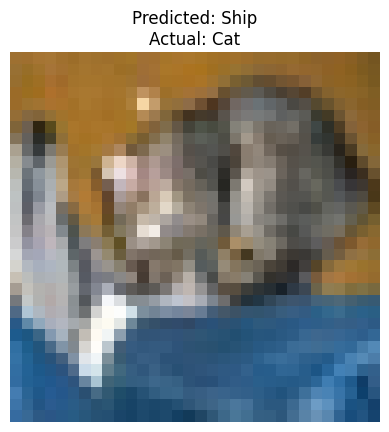

In [23]:
# Animate predictions
def animate_predictions(i):
    plt.cla()
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[y_test[i][0]]}")
    plt.axis('off')

fig = plt.figure()
ani = animation.FuncAnimation(fig, animate_predictions, frames=20, interval=1000, repeat=False)
HTML(ani.to_jshtml())

### Confusion Matrix

Compute and visualize the confusion matrix to evaluate the model's performance. The confusion matrix provides insights into the types of errors the model is making.

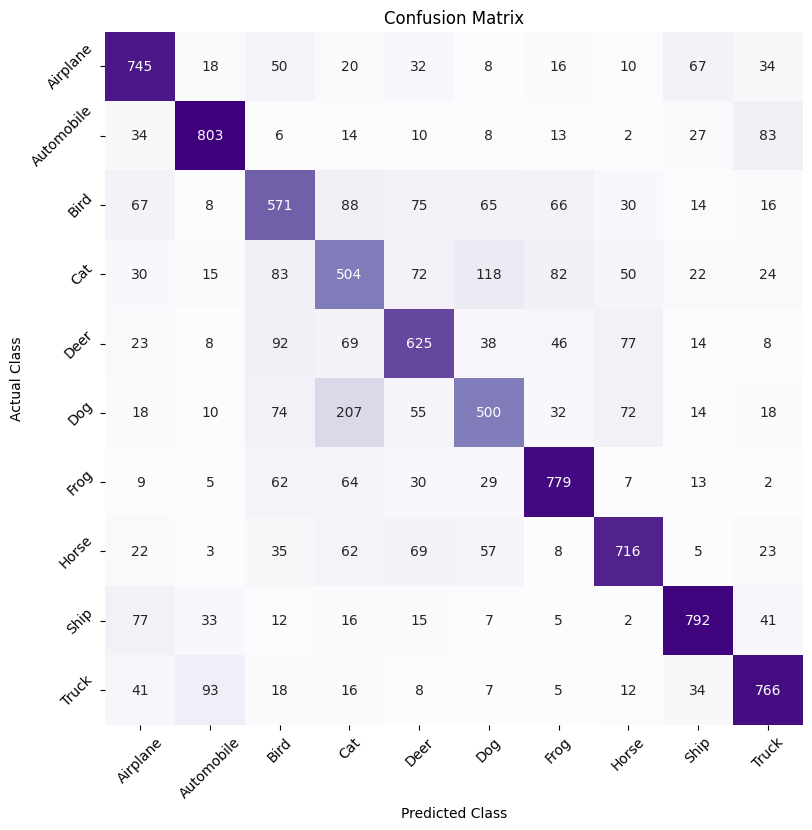

In [26]:
# Compute and plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(9, 9))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45)
plt.show()

### Visualizing the Neural Network

Visualize the neural network architecture using Graphviz. This visualization provides a clear view of the layers in the network and how they are connected.

In [27]:
# Function to visualize the neural network model
def visualize_model(model):
    # Create a new Digraph object
    dot = Digraph()

    # Add the input layer node
    dot.node('input', 'Input Layer\n32x32x3')

    # Add nodes for each layer in the model
    for i, layer in enumerate(model.layers):
        layer_name = layer.__class__.__name__
        if 'conv' in layer_name.lower():
            layer_type = f"{layer_name}\n{layer.filters} filters\n{layer.kernel_size} kernel"
        elif 'pool' in layer_name.lower():
            layer_type = f"{layer_name}\n{layer.pool_size} pool"
        elif 'dense' in layer_name.lower():
            layer_type = f"{layer_name}\n{layer.units} units"
        else:
            layer_type = layer_name

        # Create a unique node name for each layer
        node_name = f"{layer_name}_{i}"
        dot.node(node_name, layer_type)

        # Connect the previous layer to the current layer
        if i == 0:
            dot.edge('input', node_name)
        else:
            prev_node_name = f"{model.layers[i-1].__class__.__name__}_{i-1}"
            dot.edge(prev_node_name, node_name)

    # Add the output layer node
    dot.node('output', 'Output Layer\n10 classes')
    dot.edge(f"{model.layers[-1].__class__.__name__}_{len(model.layers)-1}", 'output')

    return dot

# Visualize the model
dot = visualize_model(model)
dot.render('model_visualization', format='png', view=True)

'model_visualization.png'

### Neural Network Architecture Visualization

This section includes code to visualize the neural network architecture. The diagram helps to understand the structure and connectivity of different layers in the network.

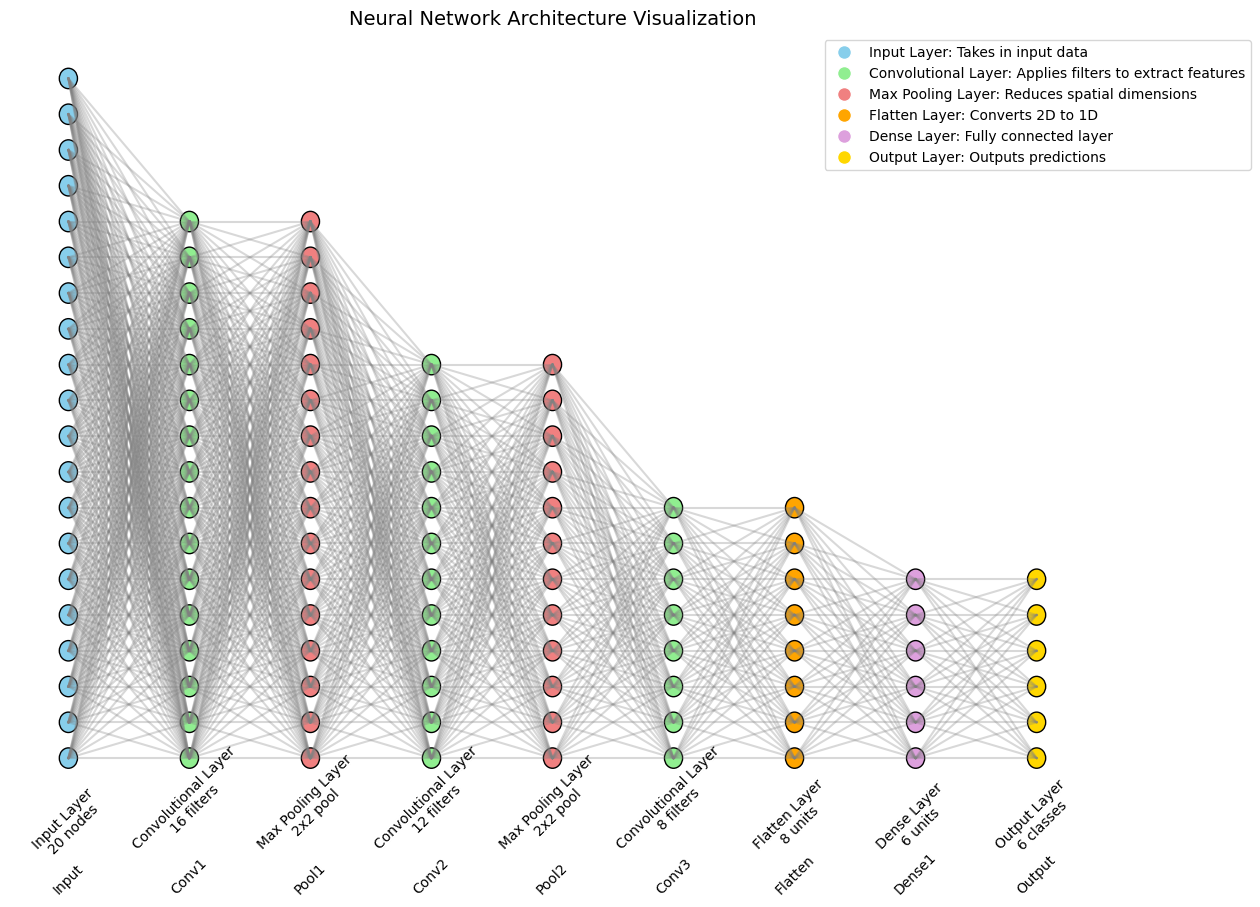

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Define a neural network structure for visualization with doubled nodes
layers = [
    {'type': 'input', 'nodes': 20, 'description': 'Input Layer\n20 nodes', 'short_name': 'Input'},
    {'type': 'conv', 'nodes': 16, 'description': 'Convolutional Layer\n16 filters', 'short_name': 'Conv1'},
    {'type': 'pool', 'nodes': 16, 'description': 'Max Pooling Layer\n2x2 pool', 'short_name': 'Pool1'},
    {'type': 'conv', 'nodes': 12, 'description': 'Convolutional Layer\n12 filters', 'short_name': 'Conv2'},
    {'type': 'pool', 'nodes': 12, 'description': 'Max Pooling Layer\n2x2 pool', 'short_name': 'Pool2'},
    {'type': 'conv', 'nodes': 8, 'description': 'Convolutional Layer\n8 filters', 'short_name': 'Conv3'},
    {'type': 'flatten', 'nodes': 8, 'description': 'Flatten Layer\n8 units', 'short_name': 'Flatten'},
    {'type': 'dense', 'nodes': 6, 'description': 'Dense Layer\n6 units', 'short_name': 'Dense1'},
    {'type': 'output', 'nodes': 6, 'description': 'Output Layer\n6 classes', 'short_name': 'Output'}
]

fig, ax = plt.subplots(figsize=(14, 10))
ax.axis('off')

# Store node positions for connecting edges later
node_positions = []

# Define the y positions for each layer to fit within the plot
max_nodes = max(layer['nodes'] for layer in layers)
layer_offsets = np.linspace(-max_nodes / 2, max_nodes / 2, max_nodes)

# Define colors for different types of layers
colors = {
    'input': 'skyblue',
    'conv': 'lightgreen',
    'pool': 'lightcoral',
    'flatten': 'orange',
    'dense': 'plum',
    'output': 'gold'
}

# Draw the initial plot with layer labels and nodes
for idx, layer in enumerate(layers):
    x_offset = idx * 4  # Adjusted horizontal spacing between layers
    y_positions = layer_offsets[:layer['nodes']]
    positions = []
    for y in y_positions:
        circle = plt.Circle((x_offset, y), 0.3, fill=True, facecolor=colors[layer['type']], edgecolor='black')
        ax.add_patch(circle)
        positions.append((x_offset, y))
    node_positions.append(positions)
    ax.text(x_offset, -max_nodes / 2 - 4, layer['short_name'], ha='center', rotation=45, fontsize=10)
    ax.text(x_offset, -max_nodes / 2 - 3, layer['description'], ha='center', rotation=45, fontsize=10)

# Draw edges between the layers
for i in range(len(layers) - 1):
    for j in range(len(node_positions[i])):
        for k in range(len(node_positions[i + 1])):
            x0, y0 = node_positions[i][j]
            x1, y1 = node_positions[i + 1][k]
            ax.plot([x0, x1], [y0, y1], color='grey', alpha=0.3)  # Adjusted edge thickness and opacity

# Create detailed legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Input Layer: Takes in input data', 
               markerfacecolor=colors['input'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Convolutional Layer: Applies filters to extract features', 
               markerfacecolor=colors['conv'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Max Pooling Layer: Reduces spatial dimensions', 
               markerfacecolor=colors['pool'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Flatten Layer: Converts 2D to 1D', 
               markerfacecolor=colors['flatten'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Dense Layer: Fully connected layer', 
               markerfacecolor=colors['dense'], markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Output Layer: Outputs predictions', 
               markerfacecolor=colors['output'], markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.15, 1))

# Add title
plt.title('Neural Network Architecture Visualization', fontsize=14)

plt.show()